In [17]:
library(tidyverse)
library(dplyr)

In [2]:
load("./ICPSR_38779/DS0001/38779-0001-Data.rda")

In [99]:
load("./ICPSR_38740/DS0001/38740-0001-Data.rda")

load("./ICPSR_38743/DS0001/38743-0001-Data.rda")

In [4]:
names(da38779.0001)

[1] "ASR_ID"   "CONTENTS" "STATE"    "ORI"      "GROUP"    "DIV"     
 [7] "AGHEADER" "YEAR"     "MSA"      "COUNTY"   "SEQNO"    "SUB"     
[13] "CORE"     "COVBY"    "POP"      "AGENCY"   "STNAME"   "MONTH"   
[19] "MOHEADER" "BREAK"    "AREO"     "ZERO"     "DTLASTUP" "DTPRUP1" 
[25] "DTPRUP2"  "JUVDISP"  "JDHANDDP" "JDREFJC"  "JDREFWA"  "JDREFOPA"
[31] "JDREFCC"  "OFFENSE"  "OCCUR"    "M0_9"     "M10_12"   "M13_14"  
[37] "M15"      "M16"      "M17"      "M18"      "M19"      "M20"     
[43] "M21"      "M22"      "M23"      "M24"      "M25_29"   "M30_34"  
[49] "M35_39"   "M40_44"   "M45_49"   "M50_54"   "M55_59"   "M60_64"  
[55] "M65"      "F0_9"     "F10_12"   "F13_14"   "F15"      "F16"     
[61] "F17"      "F18"      "F19"      "F20"      "F21"      "F22"     
[67] "F23"      "F24"      "F25_29"   "F30_34"   "F35_39"   "F40_44"  
[73] "F45_49"   "F50_54"   "F55_59"   "F60_64"   "F65"      "AW"      
[79] "AB"       "AI"       "AA"       "JW"       "JB"       "JI"      
[85] "JA"       "AH"       "AN"       "JH"       "JN"

In [130]:
index <- which(colnames(da38779.0001) == 'MONTH')
index

[1] 18

In [164]:
print(da38779.0001[5,])

               ASR_ID          CONTENTS       STATE       ORI GROUP         DIV
5 (3) ASR Master File (3) Detail record (50) Alaska AK00101      1C (9) Pacific
                   AGHEADER YEAR MSA COUNTY SEQNO              SUB CORE COVBY
5 (0) Agency header present 2019  38      0     0 (0) Non-Suburban    Y    NA
     POP                   AGENCY STNAME MONTH                 MOHEADER BREAK
5 287731 ANCHORAGE                ALASKA     1 (0) Month header present     G
  AREO         ZERO DTLASTUP DTPRUP1 DTPRUP2 JUVDISP JDHANDDP JDREFJC JDREFWA
5    1 (0) Not used    70618   70218   62918       0        0       0       0
  JDREFOPA JDREFCC OFFENSE OCCUR M0_9 M10_12 M13_14 M15 M16 M17 M18 M19 M20 M21
5        0       0     04     58    0      1      1   2   1   0   2   1   0   2
  M22 M23 M24 M25_29 M30_34 M35_39 M40_44 M45_49 M50_54 M55_59 M60_64 M65 F0_9
5   3   2   1     13     10      9      7      2      4      4      0   0    0
  F10_12 F13_14 F15 F16 F17 F18 F19 F20 F21 F22 F23 F2

In [131]:
da1 = da38779.0001[,c(3, 8, 18, 32, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]
da2 = da38740.0001[,c(3, 8, 18, 32, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]
da3 = da38743.0001[,c(3, 8, 18, 32, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]

In [132]:
summary(da1)

               STATE             YEAR          MONTH           OFFENSE      
 (04) California  :117232   Min.   :2019   Min.   : 1.000   26     :110445  
 (42) Texas       : 98576   1st Qu.:2019   1st Qu.: 3.000   18     : 97363  
 (37) Pennsylvania: 85692   Median :2019   Median : 6.000   21     : 92035  
 (29) New Jersey  : 60935   Mean   :2019   Mean   : 6.309   185    : 91698  
 (31) New York    : 48869   3rd Qu.:2019   3rd Qu.: 9.000   08     : 88036  
 (21) Michigan    : 47643   Max.   :2019   Max.   :12.000   (Other):871739  
 (Other)          :897078                  NA's   :4709     NA's   :  4709  
       AW                AB               AI               AA        
 Min.   :   0.00   Min.   :   0.0   Min.   :  0.0    Min.   :  0.0   
 1st Qu.:   1.00   1st Qu.:   0.0   1st Qu.:  0.0    1st Qu.:  0.0   
 Median :   2.00   Median :   1.0   Median :  0.0    Median :  0.0   
 Mean   :   5.38   Mean   :   2.8   Mean   :  0.3    Mean   :  0.2   
 3rd Qu.:   4.00   3rd Qu.:   2.0 

In [133]:
subset_da1 <- subset(da1, OFFENSE == '04 ')
subset_da2 <- subset(da2, OFFENSE == '04 ')
subset_da3 <- subset(da3, OFFENSE == '04 ')



In [134]:
dim(subset_da1)

[1] 54496    16

In [135]:
dim(subset_da2)

[1] 62064    16

In [136]:
dim(subset_da3)

[1] 57775    16

In [137]:
combined_df <- bind_rows(subset_da1, subset_da2, subset_da3)

In [163]:
head(combined_df, 50)

,STATE,YEAR,MONTH,OFFENSE,AW,AB,AI,AA,JW,JB,JI,JA,AH,AN,JH,JN
,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,1,04,28,13,36,4,1,0,5,0,NA,NA,NA,NA
2,(50) Alaska,2019,2,04,33,18,28,3,3,1,1,0,NA,NA,NA,NA
3,(50) Alaska,2019,3,04,36,14,35,8,4,1,1,0,NA,NA,NA,NA
4,(50) Alaska,2019,4,04,33,12,39,5,7,1,1,2,NA,NA,NA,NA
5,(50) Alaska,2019,5,04,28,11,45,9,4,0,2,0,NA,NA,NA,NA
6,(50) Alaska,2019,6,04,29,8,42,13,2,0,2,0,NA,NA,NA,NA
7,(50) Alaska,2019,7,04,55,18,33,8,0,0,2,3,NA,NA,NA,NA
8,(50) Alaska,2019,8,04,34,15,31,6,0,3,3,0,NA,NA,NA,NA
9,(50) Alaska,2019,9,04,36,15,36,12,1,0,1,0,NA,NA,NA,NA


In [139]:
summary(combined_df)

               STATE             YEAR          MONTH           OFFENSE      
 (04) California  : 18000   Min.   :2017   Min.   : 1.000   04     :174335  
 (42) Texas       : 16672   1st Qu.:2017   1st Qu.: 4.000   00     :     0  
 (37) Pennsylvania: 10705   Median :2018   Median : 6.000   01A    :     0  
 (21) Michigan    :  7206   Mean   :2018   Mean   : 6.455   01B    :     0  
 (41) Tennessee   :  6517   3rd Qu.:2019   3rd Qu.: 9.000   02     :     0  
 (29) New Jersey  :  6233   Max.   :2019   Max.   :12.000   03     :     0  
 (Other)          :109002                                   (Other):     0  
       AW                AB                AI               AA       
 Min.   :  0.000   Min.   :   0.00   Min.   :  0.00   Min.   : 0.00  
 1st Qu.:  1.000   1st Qu.:   0.00   1st Qu.:  0.00   1st Qu.: 0.00  
 Median :  1.000   Median :   1.00   Median :  0.00   Median : 0.00  
 Mean   :  3.456   Mean   :   2.39   Mean   :  0.23   Mean   : 0.15  
 3rd Qu.:  3.000   3rd Qu.:   2.00

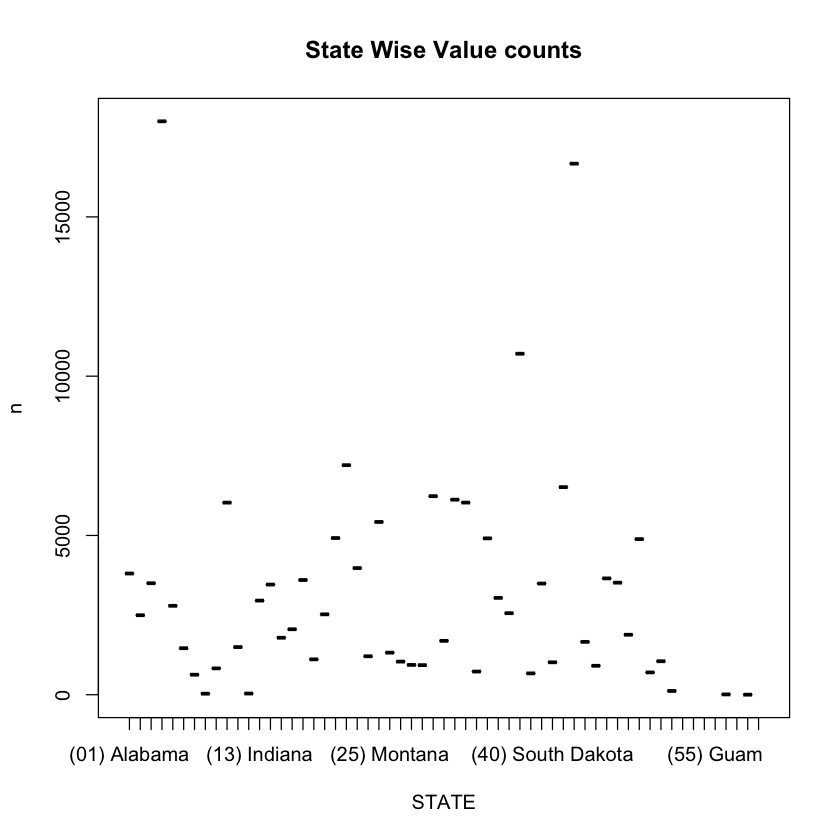

In [144]:
value_counts <- combined_df %>%
  count(STATE)

plot(value_counts, main = "State Wise Value counts")

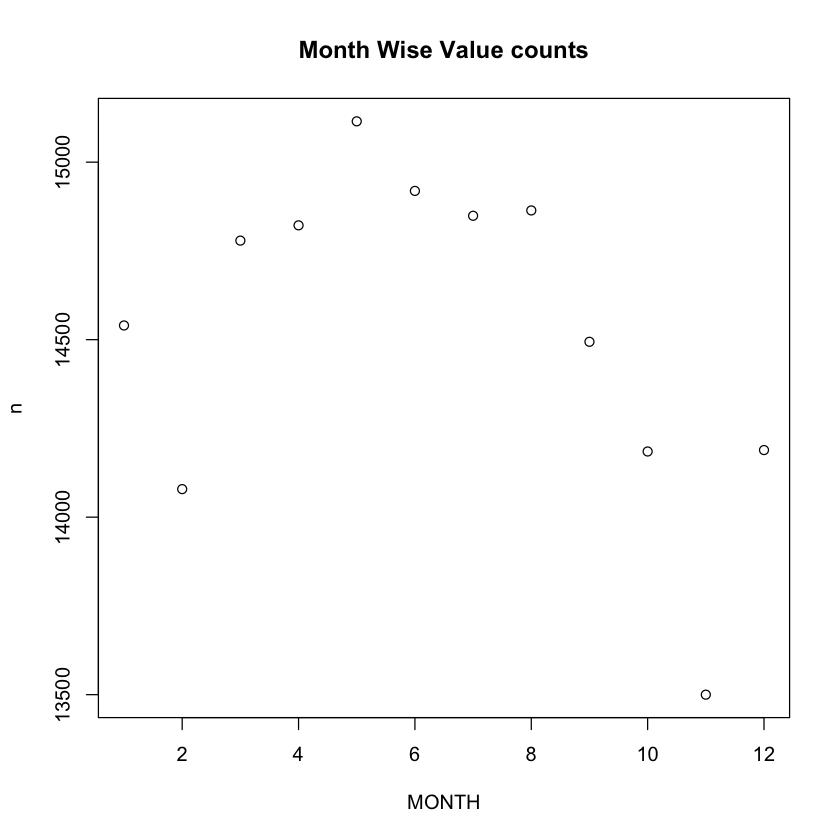

In [145]:
value_counts <- combined_df %>% count(MONTH)

plot(value_counts, main = "Month Wise Value counts")

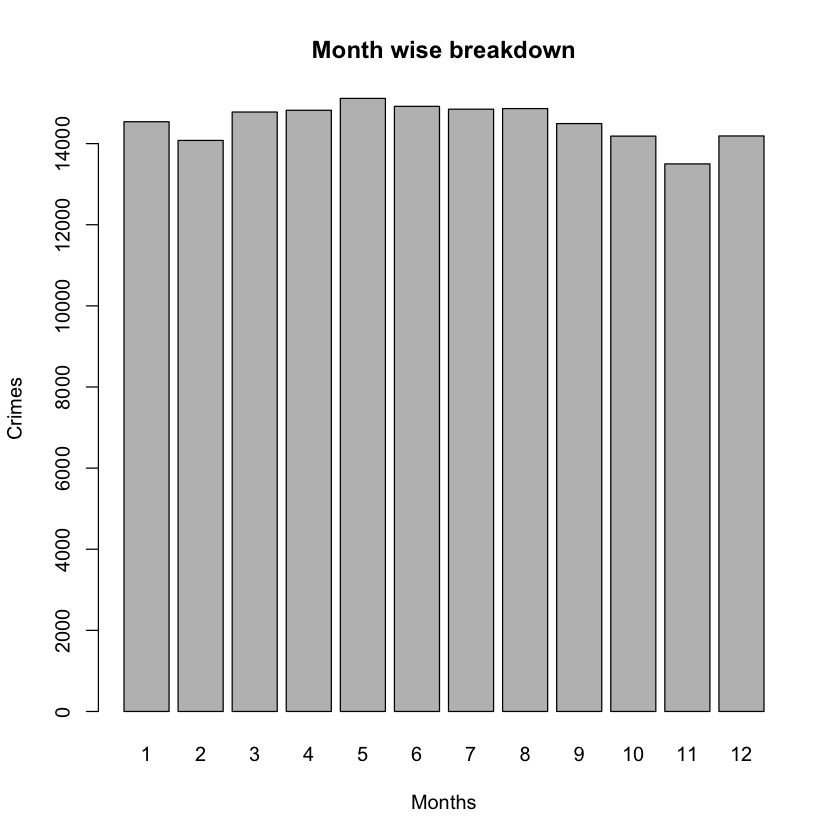

In [157]:
barplot(value_counts$n, names.arg = value_counts$MONTH, xlab = 'Months', ylab = 'Crimes', main = 'Month wise breakdown')

In [159]:
value_counts <- combined_df %>% count(YEAR, MONTH)


In [160]:
value_counts

YEAR,MONTH,n
<dbl>,<dbl>,<int>
2017,1,5224
2017,2,5112
2017,3,5272
2017,4,5309
2017,5,5303
2017,6,5284
2017,7,5340
2017,8,5155
2017,9,5151


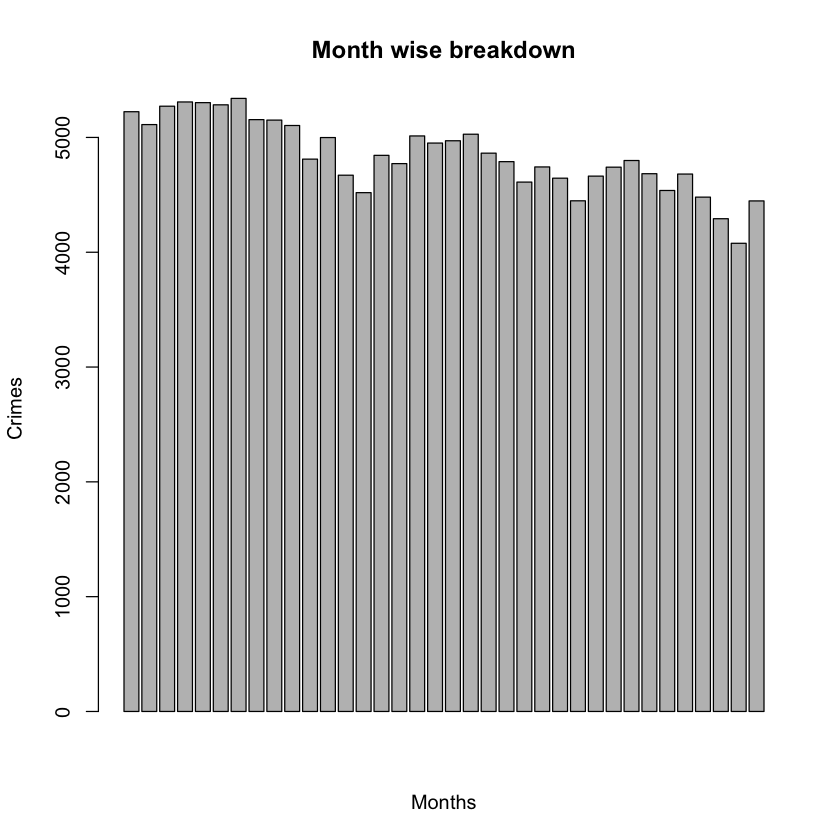

In [161]:
barplot(value_counts$n, xlab = 'Months', ylab = 'Crimes', main = 'Month wise breakdown')




In [ ]:
da4 <- da1 |> 
  filter(!is.na(STATE) & !is.na(AA)) |> 
  group_by(STATE) |> 
  summarize(avg_adult_asian = mean(AA),
            count = n())
head(da4)